# Shreetan S. Naik

Intern at The Sparks Foundation

Data Science & Business Analytics

TASK NO. 6

## Title: Prediction using Decision Tree Algorithm

Create a decision tree classifier and visualize it graphically.

What is decision tree?

1. Decision tree is a supervised machine learning algorithm.

2. It is a tree like structure which has root node, branches, and leaf nodes.

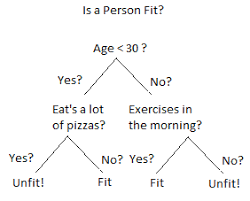

In [1]:
from IPython.display import Image
Image(filename='images.png')

In [2]:
#importing packages
import pandas as pd
import numpy as np

In [3]:
#loading dataset
df_iris = pd.read_csv('C:\\Users\\nroha\\Desktop\\GRIP_INTERNSHIP\\iris.csv')

In [4]:
df_iris

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [5]:
#finding the shape of dataset
df_iris.shape

(150, 6)

In [6]:
#checking null values
df_iris.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [7]:
df_iris.isna().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [8]:
#checking columns
df_iris.columns

Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

In [9]:
#describing the data
df_iris.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [10]:
df_iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [11]:
#finding the unique values
df_iris.nunique()

Id               150
SepalLengthCm     35
SepalWidthCm      23
PetalLengthCm     43
PetalWidthCm      22
Species            3
dtype: int64

In [12]:
#dropping the columns
df_iris.drop('Id',axis=1,inplace=True)

In [13]:
df_iris.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [14]:
set(df_iris['Species'])

{'Iris-setosa', 'Iris-versicolor', 'Iris-virginica'}

In [15]:
#categorizing the data
df_iris['Species'].replace(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'],[0,1,2],inplace=True)

In [16]:
df_iris

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [17]:
X = df_iris[['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm']]
y = df_iris['Species']

In [18]:
X.shape

(150, 4)

In [19]:
y.shape

(150,)

In [20]:
#importing the libraries
from sklearn.model_selection import train_test_split

In [21]:
#splitting the data into train and test
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=0,test_size = 0.3)

In [22]:
X_train.shape

(105, 4)

In [23]:
X_test.shape

(45, 4)

In [24]:
#building the model

from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier()

In [25]:
model.fit(X_train,y_train)

DecisionTreeClassifier()

In [26]:
pred = model.predict(X_test)

In [27]:
#creating the dataframe for actual value and predicted value
df_test = pd.DataFrame({'Actual Value':y_test,'Predicted Value':pred})

In [28]:
df_test

,Actual Value,Predicted Value
114,2,2
62,1,1
33,0,0
107,2,2
7,0,0
100,2,2
40,0,0
86,1,1
76,1,1
71,1,1


In [29]:
#finding the accuracy of matrics
from sklearn import metrics

print('Accuracy: ',metrics.accuracy_score(y_test,pred))

Accuracy:  0.9777777777777777


In [30]:
#data visualization
from sklearn import tree
import matplotlib.pyplot as plt
%matplotlib inline

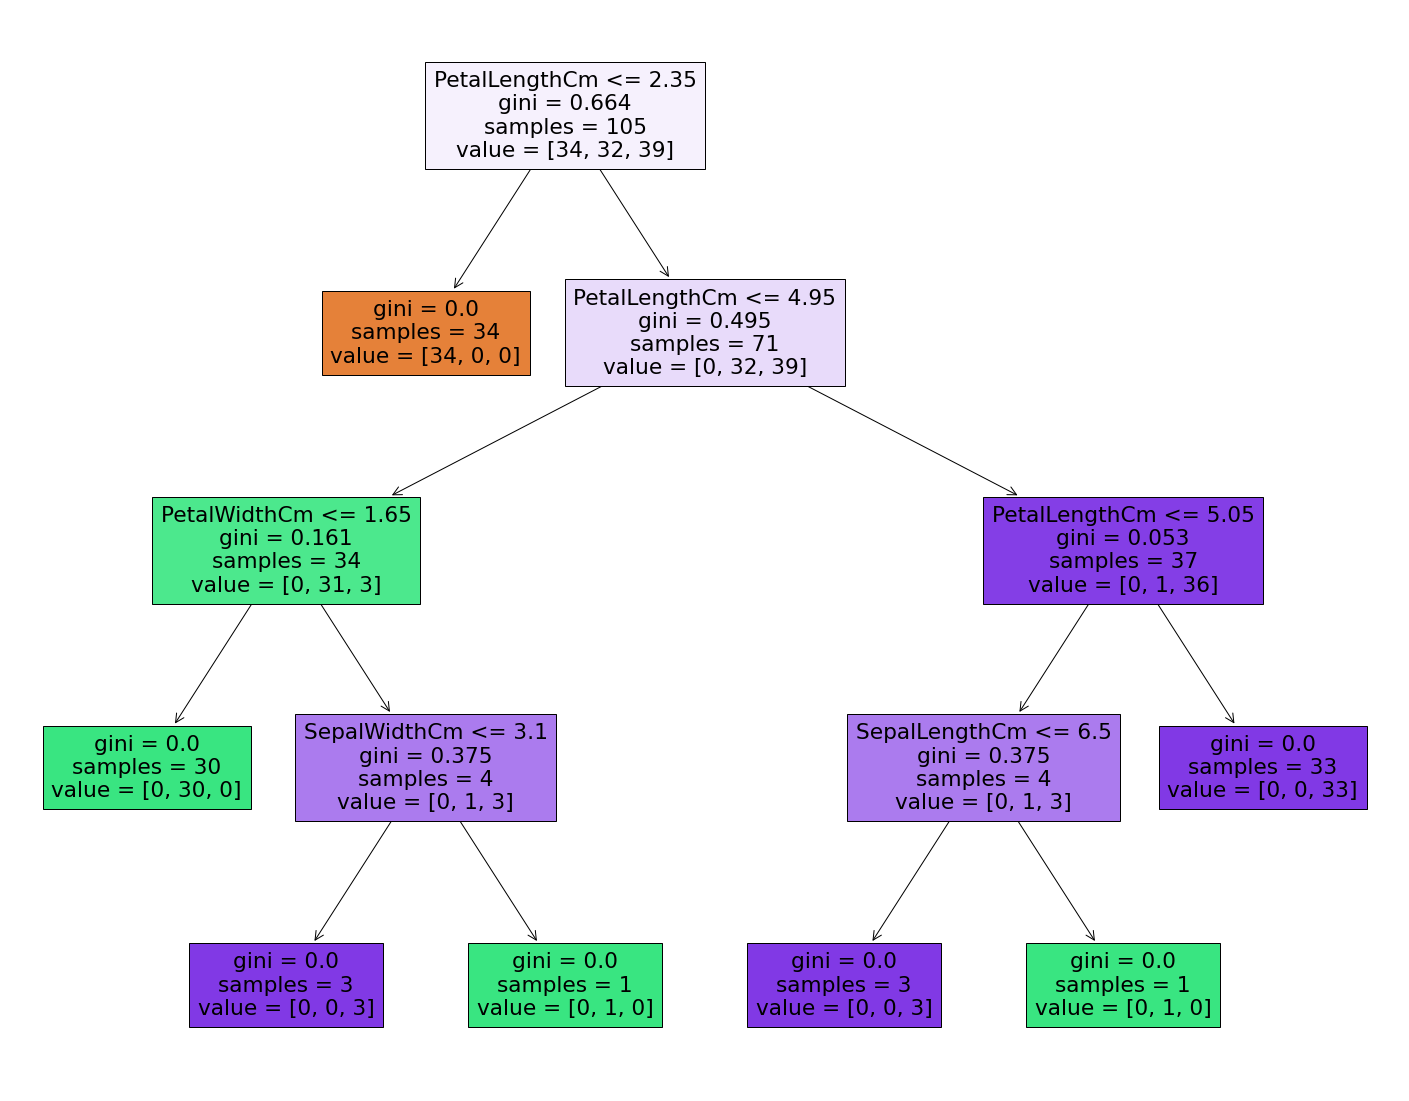

In [31]:
fig = plt.figure(figsize=(25,20))
grp=tree.plot_tree(model, feature_names=df_iris.columns,filled=True)

# Conclusion

we learnt about Decision Tree in this task and our model has given accuracy of 0.97.